## ORI 397: Statistical Methods in Manufacturing
### Homework Assigment # 7
### Name: Sanjit Paliwal
### UT EID: SP42626

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import math
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 19.4 a)

In [2]:
df_spl = pd.read_csv('Splay.csv')
df_spl['12']=df_spl['1']*df_spl['2']
df_spl['13']=df_spl['1']*df_spl['3']
df_spl['23']=df_spl['2']*df_spl['3']
df_spl['123']=df_spl['1']*df_spl['2']*df_spl['3']
df_spl = df_spl[['Test','1','2','3','12','13','23','123','y']]
df_spl

,Test,1,2,3,12,13,23,123,y
0,1,-1,-1,-1,1,1,1,-1,12
1,2,1,-1,-1,-1,-1,1,1,15
2,3,-1,1,-1,-1,1,-1,1,24
3,4,1,1,-1,1,-1,-1,-1,17
4,5,-1,-1,1,1,-1,-1,1,24
5,6,1,-1,1,-1,1,-1,-1,16
6,7,-1,1,1,-1,-1,1,-1,24
7,8,1,1,1,1,1,1,1,28


In [3]:
E_1 = ((df_spl['1']*df_spl['y']).sum())/4.0
E_2 = ((df_spl['2']*df_spl['y']).sum())/4.0
E_3 = ((df_spl['3']*df_spl['y']).sum())/4.0
E_12 = ((df_spl['12']*df_spl['y']).sum())/4.0
E_13 = ((df_spl['13']*df_spl['y']).sum())/4.0
E_23 = ((df_spl['23']*df_spl['y']).sum())/4.0
E_123 = ((df_spl['123']*df_spl['y']).sum())/4.0
E_ave = df_spl['y'].mean()
print 'Effect of Average is', E_ave
print 'Effect of temperature is', E_1
print 'Effect of Pressure is', E_2
print 'Effect of Cycle time is', E_3
print 'Effect of interaction of Temperature and Pressure is', E_12
print 'Effect of interaction of Temperature and Cycle time is', E_13
print 'Effect of interaction of Pressure and Cycle time is', E_23
print 'Effect of interaction of Temperature, Pressure and Cycle time is', E_123

Effect of Average is 20.0
Effect of temperature is -2.0
Effect of Pressure is 6.5
Effect of Cycle time is 6.0
Effect of interaction of Temperature and Pressure is 0.5
Effect of interaction of Temperature and Cycle time is 0.0
Effect of interaction of Pressure and Cycle time is -0.5
Effect of interaction of Temperature, Pressure and Cycle time is 5.5


### 19.4 b)

In [4]:
Order = np.array(range(1,8))
Effects_Estimates = np.array([-2.0,-0.5,0.0,0.5,5.5,6.0,6.5])
Effects_Identity = np.array([1,23,13,12,123,3,2])
df_eff = pd.DataFrame({})
df_eff['Order']= Order
df_eff['Effects_Estimates']= Effects_Estimates
df_eff['Effects_Identity']=Effects_Identity
df_eff['Cumulative_Probability']= (df_eff['Order']-0.5)/7.0
eff_mean = df_eff['Effects_Estimates'].mean()
eff_std = df_eff['Effects_Estimates'].std()
df_eff['Standardised_Effects']= (df_eff['Effects_Estimates'] - eff_mean)/eff_std
df_eff['Z_Scores'] = st.norm.ppf(df_eff['Cumulative_Probability'])
df_eff

,Order,Effects_Estimates,Effects_Identity,Cumulative_Probability,Standardised_Effects,Z_Scores
0,1,-2.0,1,0.071429,-1.200801,-1.465234
1,2,-0.5,23,0.214286,-0.780521,-0.791639
2,3,0.0,13,0.357143,-0.640427,-0.366106
3,4,0.5,12,0.500000,-0.500334,0.000000
4,5,5.5,123,0.642857,0.900601,0.366106
5,6,6.0,3,0.785714,1.040694,0.791639
6,7,6.5,2,0.928571,1.180787,1.465234


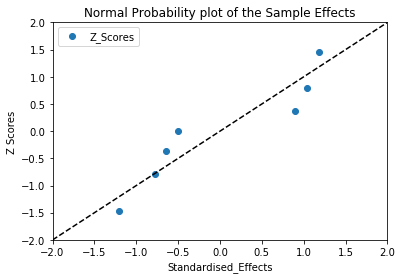

In [5]:
df_eff.plot(x='Standardised_Effects', y='Z_Scores', style='o',figsize=(6,4))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([-2,2], [-2, 2], 'k--')
plt.ylabel("Z Scores")
plt.title("Normal Probability plot of the Sample Effects")


From the above plot it can be seen that the interaction Effects $ E_{23} $ and $ E_{13} $ seem to appear on the line so they are non significant.

The significant effects are $E_1$,$E_2$,$E_3$,$E_{12}$ and $ E_{123}$.
### 19.4 c)
Now our mathematical model is 

$$ y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_{12}x_1x_2 + b_{123}x_1x_2x_3 + \epsilon $$

Now $ b_0 = E_{ave} $, $b_1 = \frac{E_1}{2} $, $b_2 = \frac{E_2}{2} $,$b_3 = \frac{E_3}{2} $,$b_{123} = \frac{E_{123}}{2} $ and $b_{12} = \frac{E_{12}}{2} $ <br>
So the final model equation becomes
$$  y = 20 - x_1 + 3.25x_2 + 3x_3 + 0.25x_1x_2 + 2.75x_1x_2x_3 + \epsilon $$

### 19.4 d)

For calculating the residuals we first find the predicted y value for each test and then find the residual as 

$$ residual = y_{obs} - y_{pred} $$

In [6]:
b_0 = E_ave
b_1 = E_1/2.0
b_2 = E_2/2.0
b_3 = E_3/2.0
b_12 = E_12/2.0
b_123 = E_123/2.0
df_spl['y_pred']= b_0 + b_1*df_spl['1'] + b_2*df_spl['2'] + b_3*df_spl['3'] + b_12*df_spl['12'] + b_123*df_spl['123']
df_spl['Residuals']=df_spl['y']-df_spl['y_pred']
df_spl

,Test,1,2,3,12,13,23,123,y,y_pred,Residuals
0,1,-1,-1,-1,1,1,1,-1,12,12.25,-0.25
1,2,1,-1,-1,-1,-1,1,1,15,15.25,-0.25
2,3,-1,1,-1,-1,1,-1,1,24,23.75,0.25
3,4,1,1,-1,1,-1,-1,-1,17,16.75,0.25
4,5,-1,-1,1,1,-1,-1,1,24,23.75,0.25
5,6,1,-1,1,-1,1,-1,-1,16,15.75,0.25
6,7,-1,1,1,-1,-1,1,-1,24,24.25,-0.25
7,8,1,1,1,1,1,1,1,28,28.25,-0.25


### 19.7 a)

To get the effect for a Variable we simply multiply the corresponding value of the <br>
variable column with the mean response value then sum all these values and divide the <br>sum by 4 to get the effect value.

In [7]:
df_che = pd.read_csv('Chemical_Yield.csv')
df_che['Y_bar']= (df_che['Week 1']+df_che['Week 2']+df_che['Week 3'])/3.0
df_che['Temperature*Catalyst']=df_che['Temperature']*df_che['Catalyst']
df_che['Temperature*pH']=df_che['Temperature']*df_che['pH']
df_che['Catalyst*pH']=df_che['Catalyst']*df_che['pH']
df_che['Temperature*Catalyst*pH']=df_che['Temperature']*df_che['Catalyst']*df_che['pH']
df_che = df_che[['Test','Temperature','Catalyst','pH','Temperature*Catalyst','Temperature*pH','Catalyst*pH',
                 'Temperature*Catalyst*pH','Week 1','Week 2','Week 3','Y_bar']]
df_che

,Test,Temperature,Catalyst,pH,Temperature*Catalyst,Temperature*pH,Catalyst*pH,Temperature*Catalyst*pH,Week 1,Week 2,Week 3,Y_bar
0,1,-1,-1,-1,1,1,1,-1,60.4,62.1,63.4,61.966667
1,2,1,-1,-1,-1,-1,1,1,64.1,79.4,74.0,72.500000
2,3,-1,1,-1,-1,1,-1,1,59.6,61.2,57.5,59.433333
3,4,1,1,-1,1,-1,-1,-1,66.7,67.3,68.9,67.633333
4,5,-1,-1,1,1,-1,-1,1,63.3,66.0,65.3,64.866667
5,6,1,-1,1,-1,1,-1,-1,91.2,77.4,84.9,84.500000
6,7,-1,1,1,-1,-1,1,-1,68.1,71.3,68.6,69.333333
7,8,1,1,1,1,1,1,1,75.3,77.1,76.1,76.166667


In [8]:
E_temp = ((df_che['Temperature']*df_che['Y_bar']).sum())/4.0
E_cat = ((df_che['Catalyst']*df_che['Y_bar']).sum())/4.0
E_pH = ((df_che['pH']*df_che['Y_bar']).sum())/4.0
E_tempcat = ((df_che['Temperature*Catalyst']*df_che['Y_bar']).sum())/4.0
E_temppH = ((df_che['Temperature*pH']*df_che['Y_bar']).sum())/4.0
E_catpH = ((df_che['Catalyst*pH']*df_che['Y_bar']).sum())/4.0
E_tempcatpH = ((df_che['Temperature*Catalyst*pH']*df_che['Y_bar']).sum())/4.0
print 'Effect of temperature is', E_temp
print 'Effect of Catalyst is', E_cat
print 'Effect of pH is', E_pH
print 'Effect of interaction of Temperature and Catalyst is', E_tempcat
print 'Effect of interaction of Temperature and pH is', E_temppH
print 'Effect of interaction of Catalyst and ph is', E_catpH
print 'Effect of interaction of Temperature,Catalyst and pH is', E_tempcatpH

Effect of temperature is 11.3
Effect of Catalyst is -2.81666666667
Effect of pH is 8.33333333333
Effect of interaction of Temperature and Catalyst is -3.78333333333
Effect of interaction of Temperature and pH is 1.93333333333
Effect of interaction of Catalyst and ph is 0.883333333333
Effect of interaction of Temperature,Catalyst and pH is -2.61666666667


### 19.7 b)
As we know that all the cases are replicated equal number of times we use the following formula 

$$ {S_{p}}^2 = \frac{{S_{1}}^2+{S_{2}}^2 + ... + {S_{k}}^2}{k}$$ where k is the number of test levels which in our case is 8 <br>
where each $ {S_{i}}^2 $ is the sample variance of an individual test level

In [9]:
df_che['Sample_Variance']= ((df_che['Y_bar']-df_che['Week 1'])*(df_che['Y_bar']-df_che['Week 1']) \
                            + (df_che['Y_bar']-df_che['Week 2'])*(df_che['Y_bar']-df_che['Week 2']) \
                            + (df_che['Y_bar']-df_che['Week 3'])*(df_che['Y_bar']-df_che['Week 3']) )/2.0
s_p2 = (df_che['Sample_Variance'].sum())/8.0
# As we know that sample variance of an effect is same for all effects we find it as
# Here N= 8*3 = 24
N = 24.0
s_vareffect = (4.0*s_p2)/N
print 'Pooled sample variance is',s_p2, 'and Sample variance of effect is',s_vareffect

Pooled sample variance is 15.085 and Sample variance of effect is 2.51416666667


To calculate the Confidence Interval we use 16 degree of freedom so our two t values are:
    $$ t_{16,97.5} = 2.120 $$
    $$ t_{16,2.5} = -2.120 $$
Confidence Intervals of Effect is now calculated as follows :
    $$ Confidence Interval = E_i \pm 2.12*S_{effect} $$

In [10]:
s_stdeffect = math.sqrt(s_vareffect)
CI_temp = (E_temp - 2.12*s_stdeffect,E_temp + 2.12*s_stdeffect)
CI_cat = (E_cat - 2.12*s_stdeffect,E_cat + 2.12*s_stdeffect)
CI_pH = (E_pH - 2.12*s_stdeffect,E_pH + 2.12*s_stdeffect)
CI_tempcat = (E_tempcat - 2.12*s_stdeffect,E_tempcat + 2.12*s_stdeffect)
CI_temppH = (E_temppH - 2.12*s_stdeffect,E_temppH + 2.12*s_stdeffect)
CI_catpH = (E_catpH - 2.12*s_stdeffect,E_catpH + 2.12*s_stdeffect)
CI_tempcatpH = (E_tempcatpH - 2.12*s_stdeffect,E_tempcatpH + 2.12*s_stdeffect)
print 'Confidence Interval of Temperature is',CI_temp
print 'Confidence Interval of Catalyst is',CI_cat
print 'Confidence Interval of pH is',CI_pH
print 'Confidence Interval of interaction of Temperature and Catalyst is',CI_tempcat
print 'Confidence Interval of interaction of Temperature and pH is',CI_temppH
print 'Confidence Interval of interaction of Catalyst and pH  is',CI_catpH
print 'Confidence Interval of interaction of Temperature, Catalyst and pH is',CI_tempcatpH

Confidence Interval of Temperature is (7.938501722941588, 14.661498277058413)
Confidence Interval of Catalyst is (-6.178164943725086, 0.5448316103917392)
Confidence Interval of pH is (4.971835056274916, 11.694831610391741)
Confidence Interval of interaction of Temperature and Catalyst is (-7.144831610391748, -0.42183505627492224)
Confidence Interval of interaction of Temperature and pH is (-1.4281649437250792, 5.294831610391746)
Confidence Interval of interaction of Catalyst and pH  is (-2.4781649437250906, 4.244831610391735)
Confidence Interval of interaction of Temperature, Catalyst and pH is (-5.9781649437250834, 0.7448316103917421)


Confidence Intervals of Temperature, pH and interaction of Temperature and Catalyst do not contain zero so we can say that the effects Temperature, pH and interaction of Temperature and Catalyst are significant. <br>
Confidence Intervals of Catalyst,interaction of Temperature and pH, interaction of Catalyst and pH and interaction of Temperature, Catalyst and pH do contain zero so we can say that these effects are not significant.

### 19.7 c)

Now the model with only the statistically significant terms are as follows:

$$ b_0 = 69.55 $$ <br>
$$ b_{Temperature}= \frac{E_{Temperature}}{2} = 5.65 $$ <br>
$$ b_{pH}= \frac{E_{pH}}{2} = 4.166 $$ <br>
$$ b_{Tempcatalyst}= \frac{E_{Tempcatalyst}}{2} = -1.89 $$

So the final model is 

$$ y = 69.55 + 5.65*Temperature +4.166*pH -1.89*TemperatureCatalyst $$

Now we calculate the predicted values of y for this

In [11]:
temp = np.array([-1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,1,-1,1,-1,1,-1,1,1,-1])
pH = np.array([-1,1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1])
tempcatalyst = np.array([-1,1,1,-1,1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,1,1,-1,1,-1,1])
test_number = np.array(range(1,25))
y = np.array([59.6,75.3,66.7,91.2,60.4,68.1,63.3,64.1,66,62.1,79.4,71.3,61.2,77.4,77.1,67.3,57.5,84.9,63.4,76.1,68.6,68.9,74,65.3])
df_res = pd.DataFrame({})
df_res['test_number']=test_number
df_res['temp']=temp
df_res['pH']=pH
df_res['tempcatalyst']=tempcatalyst
df_res['y']=y
df_res['y_pred'] = 69.55 + 5.65*df_res['temp'] + 4.166*df_res['pH'] -1.89*df_res['tempcatalyst']
df_res['error'] = df_res['y']-df_res['y_pred']
errorsorted = df_res.error.values
errorsorted = sorted(errorsorted)
df_res['error_sorted'] = errorsorted 
df_res['Probability'] = (df_res['test_number']-0.5)/24.0
df_res

,test_number,temp,pH,tempcatalyst,y,y_pred,error,error_sorted,Probability
0,1,-1,-1,-1,59.6,61.624,-2.024,-8.824,0.020833
1,2,1,1,1,75.3,77.476,-2.176,-4.124,0.062500
2,3,1,-1,1,66.7,69.144,-2.444,-3.856,0.104167
3,4,1,1,-1,91.2,81.256,9.944,-2.876,0.145833
4,5,-1,-1,1,60.4,57.844,2.556,-2.444,0.187500
5,6,-1,1,-1,68.1,69.956,-1.856,-2.176,0.229167
6,7,-1,1,1,63.3,66.176,-2.876,-2.024,0.270833
7,8,1,-1,-1,64.1,72.924,-8.824,-1.856,0.312500
8,9,-1,1,1,66.0,66.176,-0.176,-1.844,0.354167
9,10,-1,-1,1,62.1,57.844,4.256,-1.376,0.395833


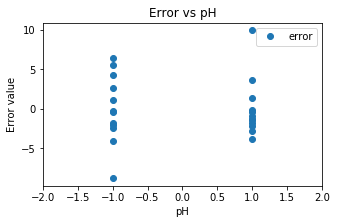

In [12]:
df_res.plot(x='pH', y='error', style='o',figsize=(5,3))
plt.ylabel("Error value")
plt.xlim(-2,2)
plt.title("Error vs pH")

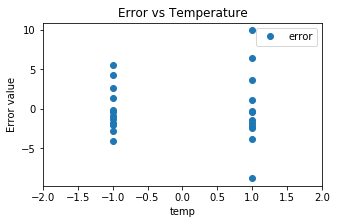

In [13]:
df_res.plot(x='temp', y='error', style='o',figsize=(5,3))
plt.ylabel("Error value")
plt.xlim(-2,2)
plt.title("Error vs Temperature")

** The above plot shows that the model is not uniform in variability which is a strong indicator of dispersion effect **

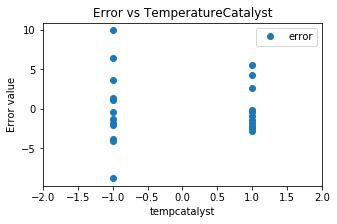

In [14]:
df_res.plot(x='tempcatalyst', y='error', style='o',figsize=(5,3))
plt.ylabel("Error value")
plt.xlim(-2,2)
plt.title("Error vs TemperatureCatalyst")

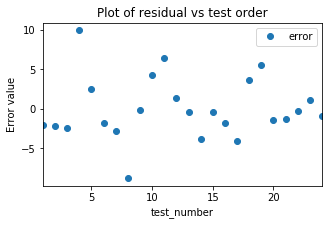

In [15]:
df_res.plot(x='test_number', y='error', style='o',figsize=(5,3))
plt.ylabel("Error value")
plt.title("Plot of residual vs test order")

** The above plot shows random pattern of residuals **

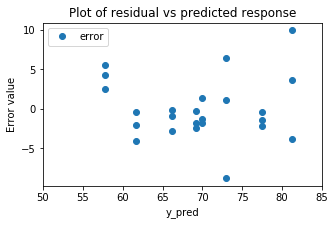

In [16]:
df_res.plot(x='y_pred', y='error', style='o',figsize=(5,3))
plt.ylabel("Error value")
plt.xlim(50,85)
plt.title("Plot of residual vs predicted response")

**Since in the plot above the errors do not lie on the straight line we can say that they don't exactly follow a Normal distribution**

### 19.19 b)

To get the effect for a Variable we simply multiply the corresponding value of the variable column with the mean response value then sum all these values and divide the sum by 2 to get the effect value.

In [17]:
df_time = pd.read_csv('Time_Assembly.csv')
df_time['Y_bar']= (df_time['Y_1'] + df_time['Y_2'] + df_time['Y_3'] + df_time['Y_4'])/4.0
df_time['FixtureType*WorkplaceLayout']= df_time['Fixture Type']*df_time['Workplace Layout']
df_time = df_time[['Test','Fixture Type','Workplace Layout','FixtureType*WorkplaceLayout','Y_1','Y_2','Y_3','Y_4','Y_bar']]
df_time

,Test,Fixture Type,Workplace Layout,FixtureType*WorkplaceLayout,Y_1,Y_2,Y_3,Y_4,Y_bar
0,1,-1,-1,1,10.24,9.78,9.96,10.23,10.0525
1,2,1,-1,-1,9.90,8.50,8.86,8.54,8.9500
2,3,-1,1,-1,14.30,13.48,12.10,11.98,12.9650
3,4,1,1,1,9.82,10.56,9.42,9.50,9.8250


In [18]:
E_fixtype = ((df_time['Fixture Type']*df_time['Y_bar']).sum())/2.0
E_worklay = ((df_time['Workplace Layout']*df_time['Y_bar']).sum())/2.0
E_fixwork = ((df_time['FixtureType*WorkplaceLayout']*df_time['Y_bar']).sum())/2.0
print 'Effect of Fixture Type is',E_fixtype
print 'Effect of Workplace Layout is',E_worklay
print 'Effect of interaction of Fixture Type and Workplace Layout is',E_fixwork

Effect of Fixture Type is -2.12125
Effect of Workplace Layout is 1.89375
Effect of interaction of Fixture Type and Workplace Layout is -1.01875


As we know that all the cases are replicated equal number of times we use the following formula 

$$ {S_{p}}^2 = \frac{{S_{1}}^2+{S_{2}}^2 + ... + {S_{k}}^2}{k}$$ where k is the number of test levels which in our case is 4 <br>
where each $ {S_{i}}^2 $ is the sample variance of an individual test level

In [19]:
df_time['Sample_Variance']= ((df_time['Y_bar']-df_time['Y_1'])*(df_time['Y_bar']-df_time['Y_1']) \
                            + (df_time['Y_bar']-df_time['Y_2'])*(df_time['Y_bar']-df_time['Y_2']) \
                            + (df_time['Y_bar']-df_time['Y_3'])*(df_time['Y_bar']-df_time['Y_3']) \
                            + (df_time['Y_bar']-df_time['Y_4'])*(df_time['Y_bar']-df_time['Y_4']))/3.0
s_p2 = (df_time['Sample_Variance'].sum())/4.0
print 'Pooled Sample Variance is',s_p2

Pooled Sample Variance is 0.500539583333


### 19.19 a)

Here we have n = 4 and m = 4 $$ \bar{\bar{y}} = \frac{\bar{y_1}+\bar{y_2}+\bar{y_3}+\bar{y_4}}{4} $$

$$ SS(Mean) = nm\bar{\bar{y}}^2 $$ and its degree of freedom is 1
$$ SS(Between tests) = n\sum_{i=1}^{m}{(\bar{y_i}-\bar{\bar{y}})^2} $$ and its degree of freedom are m-1
$$ SS(within tests) = \sum_{i=1}^{m}\sum_{j=1}^{n}{(y_{ij}-\bar{y_i})^2} $$ and its degree of freedom are m(n-1)

In [20]:
n =4
m = 4
y_grandave = (df_time['Y_bar'].sum())/m
SS_Mean = n*m*y_grandave*y_grandave
dof_Mean = 1
MS_Mean = SS_Mean/float(dof_Mean)
SS_Betweentests = (((df_time['Y_bar']-y_grandave)*(df_time['Y_bar']-y_grandave)).sum())*n
dof_Betweentests = m-1
MS_Betweentests = SS_Betweentests/float(dof_Betweentests)
SS_withintests = (df_time['Sample_Variance'].sum())*(n-1)
dof_withintests = m*(n-1)
MS_withintests = SS_withintests/float(dof_withintests)
anova_time = {}
anova_time['Sources of Variation']= ['Mean','Between Tests','Within Tests']
anova_time['Sum of Squares']=[SS_Mean,SS_Betweentests,SS_withintests]
anova_time['Degrees of Freedom']=[dof_Mean,dof_Betweentests,dof_withintests]
anova_time['Mean Square']= [MS_Mean,MS_Betweentests,MS_withintests]
anova_time['F Value'] = [MS_Mean/MS_withintests,MS_Betweentests/MS_withintests,np.nan]
df_anovatime = pd.DataFrame(anova_time)
df_anovatime = df_anovatime[['Sources of Variation','Sum of Squares','Degrees of Freedom','Mean Square','F Value']]
df_anovatime

,Sources of Variation,Sum of Squares,Degrees of Freedom,Mean Square,F Value
0,Mean,1746.613056,1,1746.613056,3489.460403
1,Between Tests,36.495369,3,12.165123,24.304018
2,Within Tests,6.006475,12,0.500540,NaN


Now Critical value of F value for $ \frac{MS(Betweentests)}{MS(Withintests)} $ is $ F(3,12,95percent) = 3.49 $ <br>
**As we see that the F value of 24.30 is much larger than the critical value we can say that variation between the various fixture/layout combinations is statistically significant**

### 19.19 c)

$$ SS_{E_{fixtype}} = \frac{nm(E_{fixtype})^2}{4} $$
$$ SS_{E_{worklay}} = \frac{nm(E_{worklay})^2}{4} $$
$$ SS_{E_{fixwork}} = \frac{nm(E_{fixwork})^2}{4} $$

In [21]:
SS_Efixtype = (n*m*E_fixtype*E_fixtype)/4.0
SS_Eworklay = (n*m*E_worklay*E_worklay)/4.0 
SS_Efixwork = (n*m*E_fixwork*E_fixwork)/4.0
print 'Sum of Squares Fixture Type is', SS_Efixtype
print 'Sum of Squares Workplace Layout is',SS_Eworklay
print 'Sum of Squares for interaction of Fixture Type and Workplace Layout',SS_Efixwork

Sum of Squares Fixture Type is 17.99880625
Sum of Squares Workplace Layout is 14.34515625
Sum of Squares for interaction of Fixture Type and Workplace Layout 4.15140625


In [22]:
anova_effects = {}
anova_effects['Source of Variation'] = ['Mean','E_FixtureType','E_Workplacelayout','E_FixtureWorkplace','Pure Error']
anova_effects['Sum of Squares']= [SS_Mean,SS_Efixtype,SS_Eworklay,SS_Efixwork,SS_withintests]
anova_effects['Degrees of Freedom'] = [1,1,1,1,dof_withintests]
anova_effects['Mean Square'] = [SS_Mean,SS_Efixtype,SS_Eworklay,SS_Efixwork,MS_withintests]
anova_effects['F value'] = [SS_Mean/MS_withintests,SS_Efixtype/MS_withintests,SS_Eworklay/MS_withintests,SS_Efixwork/MS_withintests,np.nan]
df_anovaeffects = pd.DataFrame(anova_effects)
df_anovaeffects = df_anovaeffects[['Source of Variation','Sum of Squares','Degrees of Freedom','Mean Square','F value']]
df_anovaeffects

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Square,F value
0,Mean,1746.613056,1,1746.613056,3489.460403
1,E_FixtureType,17.998806,1,17.998806,35.958807
2,E_Workplacelayout,14.345156,1,14.345156,28.659384
3,E_FixtureWorkplace,4.151406,1,4.151406,8.293862
4,Pure Error,6.006475,12,0.500540,NaN


**Now we know that the critical value of F(1,12,95%) = 4.75 and we see that all the F values for the effects are greater than this number so all the effects Fixture Type, Workplace Layout and interaction of Fixture Type and Workplace Layout are significant.**

### 19.23 a)

$$ y = b_0 + b_1x_1 + b_2x_2 + \epsilon $$ <br>
$$ b_1 = \frac{E_1}{2} $$ <br>
$$ b_2 = \frac{E_2}{2} $$
$$ b_0 = grand average of response = \bar{\bar{y}} $$

In [23]:
df_weld = pd.read_csv('Weld_Strength.csv')
df_weld['Temp']=np.array([-1,1,-1,1])
df_weld['Flux']=np.array([-1,-1,1,1])
df_weld['TempFlux'] = df_weld['Temp']*df_weld['Flux']
E_temp = ((df_weld['Average']*df_weld['Temp']).sum())/2.0
E_flux = ((df_weld['Average']*df_weld['Flux']).sum())/2.0
E_tempflux = ((df_weld['Average']*df_weld['TempFlux']).sum())/2.0
y_grandave = (df_weld['Average'].sum())/4.0
b_0 = y_grandave
b_1 = E_temp/2.0
b_2 = E_flux/2.0
print "b0 value is", b_0
print "b1 value is", b_1
print "b2 value is", b_2
print "Effect of temperature is", E_temp
print "Effect of Flux is", E_flux
print "Effect of interaction between temperature and Flux is", E_tempflux

b0 value is 2050.335
b1 value is -22.335
b2 value is -29.335
Effect of temperature is -44.67
Effect of Flux is -58.67
Effect of interaction between temperature and Flux is 2061.33


So our model becomes 
$$ y = 2050.335 - 22.335x_1 - 29.335x_2 + \epsilon $$

### 19.23 b)
Here n = 4 and m =4
Here we have n = 4 and m = 4 $$ \bar{\bar{y}} = \frac{\bar{y_1}+\bar{y_2}+\bar{y_3}+\bar{y_4}}{4} $$

$$ SS(Mean) = nm\bar{\bar{y}}^2 $$ and its degree of freedom is 1
$$ SS(within tests)=SS(pure error) = \sum_{i=1}^{m}\sum_{j=1}^{n}{(y_{ij}-\bar{y_i})^2} $$ and its degree of freedom are m(n-1)
$$ SS_{E_{temperature}} = \frac{nm(E_{temperature})^2}{4} $$ and its degree of freedom are 1
$$ SS_{E_{flux}} = \frac{nm(E_{flux})^2}{4} $$ and its degree of freedom are 1
$$ SS_{E_{tempflux}} = \frac{nm(E_{tempflux})^2}{4} $$ and its degree of freedom are 1

In [24]:
m=4
n=3
SS_Mean = n*m*y_grandave*y_grandave
dof_Mean = 1
MS_Mean = SS_Mean/float(dof_Mean)
SS_withintests = (df_weld['Sample Variance'].sum())*(n-1)
dof_withintests = m*(n-1)
MS_withintests = SS_withintests/float(dof_withintests)
SS_Etemp = (n*m*E_temp*E_temp)/4.0
SS_Eflux = (n*m*E_flux*E_flux)/4.0 
SS_Etempflux = (n*m*E_tempflux*E_tempflux)/4.0
print 'Sum of Squares of Mean is', SS_Mean
print 'Sum of Squares of Pure error(within tests) is', SS_withintests
print 'Sum of Squares Temperature is', SS_Etemp
print 'Sum of Squares Flux Strength is',SS_Eflux
print 'Sum of Squares for interaction of Temperature and Flux',SS_Etempflux

Sum of Squares of Mean is 50446483.3467
Sum of Squares of Pure error(within tests) is 670758.64
Sum of Squares Temperature is 5986.2267
Sum of Squares Flux Strength is 10326.5067
Sum of Squares for interaction of Temperature and Flux 12747244.1067


In [25]:
anova_effects = {}
anova_effects['Source of Variation'] = ['Mean','E_Temperature','E_Flux','Residual','E_TemperatureFlux','Pure Error']
anova_effects['Sum of Squares']= [SS_Mean,SS_Etemp,SS_Eflux,SS_Etempflux+SS_withintests,SS_Etempflux,SS_withintests]
anova_effects['Degrees of Freedom'] = [1,1,1,1+dof_withintests,1,dof_withintests]
anova_effects['Mean Square'] = [SS_Mean,SS_Etemp,SS_Eflux,np.nan,SS_Etempflux,MS_withintests]
anova_effects['F value'] = [SS_Mean/MS_withintests,SS_Etemp/MS_withintests,SS_Eflux/MS_withintests,np.nan,SS_Etempflux/MS_withintests,np.nan]
df_anovaeffects = pd.DataFrame(anova_effects)
df_anovaeffects = df_anovaeffects[['Source of Variation','Sum of Squares','Degrees of Freedom','Mean Square','F value']]
df_anovaeffects

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Square,F value
0,Mean,5.044648e+07,1,5.044648e+07,601.664806
1,E_Temperature,5.986227e+03,1,5.986227e+03,0.071396
2,E_Flux,1.032651e+04,1,1.032651e+04,0.123162
3,Residual,1.341800e+07,9,NaN,NaN
4,E_TemperatureFlux,1.274724e+07,1,1.274724e+07,152.033752
5,Pure Error,6.707586e+05,8,8.384483e+04,NaN


We have the critical value of F(1,8,95%) = 5.32 
Now we observe that F value of interaction effect of Temperature and Flux is much larger than the critical value which shows that this interaction effect is significant should definitely be in the model and the model suffers from lack of fit. So we should include this interaction effect in the model. <br>

Also we observe that the main effects of Temperature and Flux, F value is much smaller than the critical value so we should try to remove these variables as they are not significant.

### 19.23 c)

Now we try to remove the temperature and flux main effects from the model and introduce the interaction effect so the model now becomes:

$$ y = b_0 + b_{12}x_1x_2 + \epsilon $$ <br>
where $$ b_{12} = \frac{E_{12}}{2} $$ so $$ b_{12} = 1030.665 $$ <br>
$$ y = 2050.335 + 1030.665x_1x_2 + \epsilon $$ <br>

In [26]:
anova_effects = {}
anova_effects['Source of Variation'] = ['Mean','E_TemperatureFlux','Residual','E_Temperature + E_Flux','Pure Error']
anova_effects['Sum of Squares']= [SS_Mean,SS_Etempflux,SS_Etemp+SS_Eflux+SS_withintests,SS_Etemp+SS_Eflux,SS_withintests]
anova_effects['Degrees of Freedom'] = [1,1,2+dof_withintests,2,dof_withintests]
anova_effects['Mean Square'] = [SS_Mean,SS_Etempflux,np.nan,(SS_Etemp+SS_Eflux)/2.0,MS_withintests]
anova_effects['F value'] = [SS_Mean/MS_withintests,SS_Etempflux/MS_withintests,np.nan,(SS_Etemp+SS_Eflux)/MS_withintests,np.nan]
df_anovaeffects = pd.DataFrame(anova_effects)
df_anovaeffects = df_anovaeffects[['Source of Variation','Sum of Squares','Degrees of Freedom','Mean Square','F value']]
df_anovaeffects

,Source of Variation,Sum of Squares,Degrees of Freedom,Mean Square,F value
0,Mean,5.044648e+07,1,5.044648e+07,601.664806
1,E_TemperatureFlux,1.274724e+07,1,1.274724e+07,152.033752
2,Residual,6.870714e+05,10,NaN,NaN
3,E_Temperature + E_Flux,1.631273e+04,2,8.156367e+03,0.194559
4,Pure Error,6.707586e+05,8,8.384483e+04,NaN


As we see that the F value for the combined sum of the main effects of Temperature and Flux Strength is less than the critical F value for F(2,8,95%) = 4.46 we can say that there is no lack of fit in the model. 

### 21.13 a)

Here 4=13,5=12,6=23,and 7=123

** The Generators are I = 134 = 125 = 236 = 1237 ** <br>

** The Defining Relation is ** <br> I = 125 = 134 = 236 = 1237 = 2345 = 1356 = 357 = 1246 = 247 = 167 = 456 = 2567 = 1457 = 3467 = 1234567 

Now the Linear combinations effects neglecting the 3rd and higher order effects are

$ l_1' = 1 + 25 + 34 + 67 $ <br>
$ l_2' = 2 + 15 + 36 + 47 $ <br>
$ l_3' = 3 + 14 + 26 + 57 $ <br>
$ l_{12}' = 5 + 12 + 37 + 46 $ <br>
$ l_{13}' = 4 + 13 + 27 + 56 $ <br>
$ l_{23}' = 6 + 23 + 17 + 45 $ <br>
$ l_{123}' = 7 + 35 + 16 + 24 $ <br>


In [27]:
df_che = pd.read_csv('Chemical_Yield_Fractional.csv')
l_1 = ((df_che['1']*df_che['y']).sum()/4.0)
l_2 = ((df_che['2']*df_che['y']).sum()/4.0)
l_3 = ((df_che['3']*df_che['y']).sum()/4.0)
l_12 = ((df_che['4']*df_che['y']).sum()/4.0)
l_13 = ((df_che['5']*df_che['y']).sum()/4.0)
l_23 = ((df_che['6']*df_che['y']).sum()/4.0)
l_123 = ((df_che['7']*df_che['y']).sum()/4.0)
print 'l1 effect is',l_1
print 'l2 effect is',l_2
print 'l3 effect is',l_3
print 'l12 effect is',l_12
print 'l13 effect is',l_13
print 'l23 effect is',l_23
print 'l123 effect is',l_123

l1 effect is 0.8
l2 effect is 21.25
l3 effect is -0.4
l12 effect is 15.65
l13 effect is -1.2
l23 effect is -1.0
l123 effect is -23.55


In [28]:
Order = np.array(range(1,8))
eff_array = np.array([l_123,l_13,l_23,l_3,l_1,l_12,l_2])
eff_id = np.array([123,13,23,3,1,12,2])
df_eff = pd.DataFrame({})
df_eff['Order']= Order
df_eff['Effects_Estimates']= eff_array
df_eff['Effects_Identity']=eff_id
df_eff['Cumulative_Probability']= (df_eff['Order']-0.5)/7.0
eff_mean = df_eff['Effects_Estimates'].mean()
eff_std = df_eff['Effects_Estimates'].std()
df_eff['Standardised_Effects']= (df_eff['Effects_Estimates'] - eff_mean)/eff_std
df_eff['Z_Scores'] = st.norm.ppf(df_eff['Cumulative_Probability'])
df_eff

,Order,Effects_Estimates,Effects_Identity,Cumulative_Probability,Standardised_Effects,Z_Scores
0,1,-23.55,123,0.071429,-1.756286,-1.465234
1,2,-1.20,13,0.214286,-0.198628,-0.791639
2,3,-1.00,23,0.357143,-0.184689,-0.366106
3,4,-0.40,3,0.500000,-0.142872,0.000000
4,5,0.80,1,0.642857,-0.059240,0.366106
5,6,15.65,12,0.785714,0.975714,0.791639
6,7,21.25,2,0.928571,1.366000,1.465234


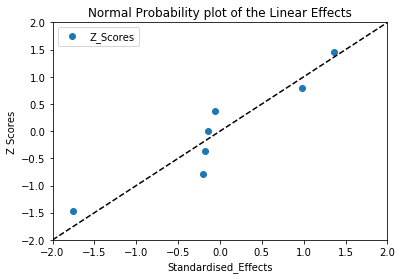

In [29]:
df_eff.plot(x='Standardised_Effects', y='Z_Scores', style='o',figsize=(6,4))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([-2,2], [-2, 2], 'k--')
plt.ylabel("Z Scores")
plt.title("Normal Probability plot of the Linear Effects")

** From the above plot it can be seen that the linear effects of $l_{123}, l_{13} $ and $l_1 $ are significant **

### 21.13 b)

For the follow up design we could use the mirror image fold over design <br>which helps us in getting the main effects without confounding them with higher order effects.

Now for the mirror fold over design we have
4 = -13, 5 = -12, 6 = -23  and 7 = 123

Generators are I = -134 = -125 = -236 = 1237

The defining relation is as follows <br>
I = -134 = -125 = -236 = 1237 = 2345 = 1246 = -247 = 1356 = -357 = -167 = -456 = 1457 = 2567 = 3467 = -1234567

Now the Linear combinations effects neglecting the 3rd and higher order effects are

$ l_1'' = 1 - 25 - 34 - 67 $ <br>
$ l_2'' = 2 - 15 - 36 - 47 $ <br>
$ l_3'' = 3 - 14 - 26 - 57 $ <br>
$ l_{12}'' = 5 - 12 - 37 - 46 $ <br>
$ l_{13}'' = 4 - 13 - 27 - 56 $ <br>
$ l_{23}'' = 6 - 23 - 17 - 45 $ <br>
$ l_{123}'' = 7 - 35 - 16 - 24 $ <br>

Now combining both models gives us

$ E_1 = \frac{l_1' + l_1''}{2} $  and $ E_{34} + E_{67} + E_{25}  = \frac{l_1' - l_1''}{2} $ <br>
$ E_2 = \frac{l_2' + l_2''}{2} $ and $ E_{13} + E_{36} + E_{47} = \frac{l_2' - l_2''}{2} $<br>
$ E_3 = \frac{l_3' + l_3''}{2} $ and $ E_{14} + E_{26} + E_{57} = \frac{l_3' - l_3''}{2} $<br>
$ E_5 = \frac{l_{12}' + l_{12}''}{2} $ and $ E_{12} + E_{37} + E_{46} = \frac{l_{12}' - l_{12}''}{2} $<br>
$ E_4 = \frac{l_{13}' + l_{13}''}{2} $ and $ E_{13} + E_{27} + E_{56} = \frac{l_{13}' - l_{13}''}{2} $<br>
$ E_6 = \frac{l_{23}' + l_{23}''}{2} $ and $ E_{23} + E_{17} + E_{45} = \frac{l_{23}' - l_{23}''}{2} $<br>
$ E_7 = \frac{l_{123}' + l_{123}''}{2} $ and $ E_{24} + E_{16} + E_{35} = \frac{l_{123}' - l_{123}''}{2} $<br>



### 21.14 a)

Mirror image model has :
4 = -12 , 5 =-13, 6 =-23,7=123 <br>
**Generators are**
I=-124=-135=-236=1237

Now the ** Defining Relation is ** <br>
I = -124 = -135 = -236 = 1237 = 2345 = 1346 = -347 = 1256 = -257 = -167 = -456 = 1457 = 2467 = 567 = -1234567

Linear combination of effects ignoring 3rd and higher order effects are <br>
$ l_1'' = E_1 - E_{24} - E_{35} - E_{67} $ <br>
$ l_2'' = E_2 - E_{14} - E_{36} - E_{57} $ <br>
$ l_3'' = E_3 - E_{15} - E_{26} - E_{47} $ <br>
$ l_{-12}'' = E_4 - E_{12} - E_{37} - E_{56} $ <br>
$ l_{-13}'' = E_5 - E_{13} - E_{27} - E_{46} $ <br>
$ l_{-23}'' = E_6 - E_{23} - E_{17} - E_{45} $ <br>
$ l_{123}'' = E_7 - E_{25} - E_{34} - E_{16} $ <br>


In [30]:
df_ch = pd.read_csv('Chemical_Yield_Next.csv')
l_1 = ((df_ch['1']*df_ch['y']).sum()/4.0)
l_2 = ((df_ch['2']*df_ch['y']).sum()/4.0)
l_3 = ((df_ch['3']*df_ch['y']).sum()/4.0)
l_12 = ((df_ch['4']*df_ch['y']).sum()/4.0)
l_13 = ((df_ch['5']*df_ch['y']).sum()/4.0)
l_23 = ((df_ch['6']*df_ch['y']).sum()/4.0)
l_123 = ((df_ch['7']*df_ch['y']).sum()/4.0)
print 'l1 effect is',l_1
print 'l2 effect is',l_2
print 'l3 effect is',l_3
print 'l12 effect is',l_12
print 'l13 effect is',l_13
print 'l23 effect is',l_23
print 'l123 effect is',l_123

l1 effect is -1.6
l2 effect is 18.9
l3 effect is 1.3
l12 effect is -0.35
l13 effect is 13.95
l23 effect is 1.05
l123 effect is -24.9


### 21.14 b)

Now combining both models gives us

$ E_1 = \frac{l_1' + l_1''}{2} $  and $ E_{24} + E_{35} + E_{67}  = \frac{l_1' - l_1''}{2} $ <br>
$ E_2 = \frac{l_2' + l_2''}{2} $ and $ E_{14} + E_{36} + E_{57} = \frac{l_2' - l_2''}{2} $<br>
$ E_3 = \frac{l_3' + l_3''}{2} $ and $ E_{15} + E_{26} + E_{47} = \frac{l_3' - l_3''}{2} $<br>
$ E_4 = \frac{l_{12}' + l_{-12}''}{2} $ and $ E_{12} + E_{37} + E_{56} = \frac{l_{12}' - l_{-12}''}{2} $<br>
$ E_5 = \frac{l_{13}' + l_{-13}''}{2} $ and $ E_{13} + E_{27} + E_{46} = \frac{l_{13}' - l_{-13}''}{2} $<br>
$ E_6 = \frac{l_{23}' + l_{-23}''}{2} $ and $ E_{23} + E_{17} + E_{45} = \frac{l_{23}' - l_{-23}''}{2} $<br>
$ E_7 = \frac{l_{123}' + l_{123}''}{2} $ and $ E_{25} + E_{16} + E_{34} = \frac{l_{123}' - l_{123}''}{2} $<br>

Now their respective values are

$ E_1 = -0.1875 $  and $ E_{24} + E_{35} + E_{67}  = 1.4125$ <br>
$ E_2 = 20.1375 $ and $ E_{14} + E_{36} + E_{57} = 1.2375 $<br>
$ E_3 = 0.4375 $ and $ E_{15} + E_{26} + E_{47} = -0.8625$<br>
$ E_4 = -0.8875$ and $ E_{12} + E_{37} + E_{56} = -0.5375$<br>
$ E_5 = 14.7125$ and $ E_{13} + E_{27} + E_{46} = 0.7625$<br>
$ E_6 = -0.0625$ and $ E_{23} + E_{17} + E_{45} = -1.1125$<br>
$ E_7 = -24.6375 $ and $ E_{25} + E_{16} + E_{34} =  0.2625$<br>

In [31]:
effects = np.array([-0.1875,20.1375,0.4375,-0.8875,14.7125,-0.0625,-24.6375,1.4125,1.2375,-0.8625,-0.5375,0.7625,-1.112,0.2625])
eff_sorted = sorted(effects)
eff_id = np.array([7,231745,4,142657,123756,1,6,342516,3,132746,152647,243567,5,2])
Order = np.array(range(1,15))
df_eff = pd.DataFrame({})
df_eff['Order']= Order
df_eff['Effects_Estimates']= eff_sorted
df_eff['Effects_Identity']=eff_id
df_eff['Cumulative_Probability']= (df_eff['Order']-0.5)/14.0
eff_mean = df_eff['Effects_Estimates'].mean()
eff_std = df_eff['Effects_Estimates'].std()
df_eff['Standardised_Effects']= (df_eff['Effects_Estimates'] - eff_mean)/eff_std
df_eff['Z_Scores'] = st.norm.ppf(df_eff['Cumulative_Probability'])
df_eff

,Order,Effects_Estimates,Effects_Identity,Cumulative_Probability,Standardised_Effects,Z_Scores
0,1,-24.6375,7,0.035714,-2.613079,-1.802743
1,2,-1.1120,231745,0.107143,-0.192847,-1.241867
2,3,-0.8875,4,0.178571,-0.169751,-0.920823
3,4,-0.8625,142657,0.250000,-0.167179,-0.674490
4,5,-0.5375,123756,0.321429,-0.133744,-0.463708
5,6,-0.1875,1,0.392857,-0.097737,-0.271880
6,7,-0.0625,6,0.464286,-0.084877,-0.089642
7,8,0.2625,342516,0.535714,-0.051442,0.089642
8,9,0.4375,3,0.607143,-0.033439,0.271880
9,10,0.7625,132746,0.678571,-0.000004,0.463708


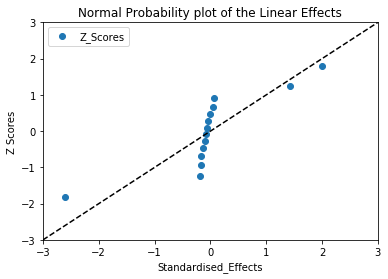

In [32]:
df_eff.plot(x='Standardised_Effects', y='Z_Scores', style='o',figsize=(6,4))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot([-3,3], [-3, 3], 'k--')
plt.ylabel("Z Scores")
plt.title("Normal Probability plot of the Linear Effects")

From the above plot it seems that the effects $ E_5 $ , $E_2 $, $E_6$, $E_1 $ and <br>
$ E_{34} + E_{25} + E_{16} $ seem to lie on the line so they are statistically insignificant

The remaining effects are statistically significant

### 21.14 c)

From the findings of the experiments and the normal probability plots it seems that the main effects <br>
of variables Chemical A concentration, Chemical B concentration and Flow rate have influence on chemical yield. <br>
The response can be maximized by working on the above mentioned variables along the path of steepest ascent 

### 23.12 

In [33]:
df_ove = pd.read_csv('Problem_23_12.csv')
df_ove['x1_2']=df_ove['x1']*df_ove['x1']
df_ove['x2_2']=df_ove['x2']*df_ove['x2']
df_ove['x3_2']=df_ove['x3']*df_ove['x3']
df_ove['x4_2']=df_ove['x4']*df_ove['x4']
df_ove['x1x2']=df_ove['x1']*df_ove['x2']
df_ove['x1x3']=df_ove['x1']*df_ove['x3']
df_ove['x2x3']=df_ove['x2']*df_ove['x3']
df_ove['x1x4']=df_ove['x1']*df_ove['x4']
df_ove['x2x4']=df_ove['x2']*df_ove['x4']
df_ove['x3x4']=df_ove['x3']*df_ove['x4']
x = df_ove[['x1','x2','x3','x4','x1_2','x2_2','x3_2','x4_2','x1x2','x1x3','x1x4','x2x3','x2x4','x3x4']]
y = df_ove['y (overrun)']
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x,y)
print model.coef_
print model.intercept_

[-24.16666667 -15.83333333 -19.08333333 -13.33333333 -80.32738095
 -33.32738095 -33.82738095 -12.45238095   3.375       -1.           6.25
  -3.25         8.           1.875     ]
531.142857143


So the second order model for the overrun response is <br>
$$ \hat{y} = 531.142 - 24.16x_1 -15.83x_2 -19.08x_3 - 13.33x_4$$ 
$$ -80.32x_1^2 - 33.32x_2^2 -33.82x_3^2 -12.45x_4^2$$
$$ +3.375x_1x_2 -1x_1x_3 + 6.25x_1x_4 -3.25x_2x_3 +8x_2x_4 + 1.875x_3x_4 $$ 